In [7]:
print('세ㄹ 실행은 shift + enter 키를 누르세요')

세ㄹ 실행은 shift + enter 키를 누르세요


In [8]:
import sys

In [9]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import tensorflow as tf

print(f'numpy {np.__version__}')
print(f'pandas {pd.__version__}')
print(f'skleaern {sklearn.__version__}')
print(f'tenserflow {tf.__version__}')

numpy 1.25.2
pandas 2.2.2
skleaern 1.4.2
tenserflow 2.16.1


# 문서를 만들때는 마크다운을 이용해 보세요

# NumPy

In [10]:
import numpy as np

In [11]:
x = list(range(10))
print(type(x))
print(x)
print(len(x))
print (x*2)
print (x + x)
x2 = [i*2 for i in x]
print(x2)

<class 'list'>
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
10
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]


In [12]:
x = np.array(range(10))
print(type(x))
print(x)
print(len(x))

print(x*2)


<class 'numpy.ndarray'>
[0 1 2 3 4 5 6 7 8 9]
10
[ 0  2  4  6  8 10 12 14 16 18]


In [13]:

x2 = np.array([[1,2,3], [4,5,6]])
print(x2)
print(len(x2))
print(x2.shape)
print('element datatype', x2.dtype)


print (x2 -x2)
print (x2 *2)

[[1 2 3]
 [4 5 6]]
2
(2, 3)
element datatype int64
[[0 0 0]
 [0 0 0]]
[[ 2  4  6]
 [ 8 10 12]]


# 기계학습 리뷰

[-5.        -4.8989899 -4.7979798]...[4.7979798 4.8989899 5.       ]
(100,) -> (100, 1)


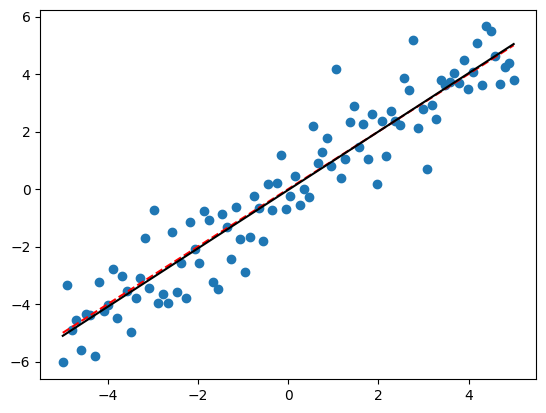

In [14]:
import matplotlib.pyplot as plt
# 기계학습 알고리즘 선택
from sklearn.linear_model import LinearRegression # 선형 회귀

# 난수 초기값 설정
random = np.random.RandomState(0)

xs = np.linspace(-5, 5, 100)
noise = np.random.randn(len(xs))
ys = xs + noise
print(f'{xs[:3]}...{xs[-3:]}')

# 선형 회귀 모델 생성
Xs = xs.reshape(-1,1)
print(xs.shape, '->', Xs.shape)
model = LinearRegression().fit(Xs, ys)

plt.scatter(xs, ys)
plt.plot(xs, ys - noise, 'r--')


# 회귀선
plt.plot(xs, model.predict(Xs), 'k-')
plt.show()

# 1943 MCP뉴런

In [15]:
x = np.array([0.1, 0.2, 0.3])
w = np.random.randn(len(x))

x * w

z = np.sum(x * w)
assert z == np.dot(x, w) == x @ w
print(f'x = {x} -> w = {w} -> z = {z:.2f}')


b = np.random.randn()
y = 1 if z > b else -1
print(f'b = {b:.2f} -> y = {y}')

x = [0.1 0.2 0.3] -> w = [ 0.83406692 -0.02739735  0.7158803 ] -> z = 0.29
b = -1.02 -> y = 1


In [16]:
def MCP뉴런(x, w, b):
    z = np.dot(x, w) + b
    y = 1 if z > 0 else -1
    return y

x = np.array([0.1, 0.2, 0.3])
w = np.random.randn(len(x))
b = np.random.randn()
y = MCP뉴런(x, w, b)
print(f'x = {x} -> MCP(w, b) -> y = {y}')

x = [0.1 0.2 0.3] -> MCP(w, b) -> y = -1



## 논리회로

In [17]:
def logic(w, b):
    x = np.array([[0,0], [0,1], [1,0], [1,1]])
    ys = []
    for xi in x:
        y = MCP뉴런(xi, w, b)
        ys.append(y)
        print(f'x = {xi} -> y = {y}')
    return ys

print('AND 게이트')
w_and = np.array([0.5, 0.5])
b_and = -0.7
logic(w_and, b_and)

print('NAND 게이트')
w_nand = -w_and
b_nand = -b_and
logic(w_nand, b_nand)

print('OR 게이트')
w_or = np.array([0.5, 0.5])
b_or = -0.2
assert all(logic(w_or, b_or) == np.array([-1, 1, 1, 1]))

AND 게이트
x = [0 0] -> y = -1
x = [0 1] -> y = -1
x = [1 0] -> y = -1
x = [1 1] -> y = 1
NAND 게이트
x = [0 0] -> y = 1
x = [0 1] -> y = 1
x = [1 0] -> y = 1
x = [1 1] -> y = -1
OR 게이트
x = [0 0] -> y = -1
x = [0 1] -> y = 1
x = [1 0] -> y = 1
x = [1 1] -> y = 1


# 1958퍼셉트론

In [18]:
class 퍼셉트론:
    def __init__(self, w, b):
        self.w = None
        self.b = None

    def __call__(self, Xs):
        z = np.dot(Xs, self.w) + self.b
        return MCP뉴런(x, self.w, self.b)

    def 학습(self, data, target):
        표본수, 특성수 = data.shape
        # 매개변수 초기화
        self.w = np.random.randn(특성수)
        self.b = np.randon.randn()

AND = 퍼셉트론(w=w_and, b=b_and)

In [19]:
class 퍼셉트론:
    def __init__(self, w, b):
        self.w = w
        self.b = b

    def __call__(self, Xs):
        z = np.dot(Xs, self.w) + self.b
        return np.where(z > 0, 1, -1)

    def 학습(self, data, target):
        표본수, 특성수 = data.shape
        # 매개변수 초기화
        self.w = np.random.randn(특성수)
        self.b = np.random.randn()

AND = 퍼셉트론(w=w_and, b=b_and)
Xs = np.array([[0,0], [0,1], [1,0], [1,1]])
ys = AND(Xs)
assert all(ys == np.array([-1, -1, -1, 1]))
print(f'xs -> 퍼셉트론 -> ys = {ys}')

xs -> 퍼셉트론 -> ys = [-1 -1 -1  1]


In [20]:
class 퍼셉트론:
    def __init__(self, w, b):
        self.w = w
        self.b = b

    def __call__(self, Xs):
        z = np.dot(Xs, self.w) + self.b
        return np.where(z > 0, 1, -1)

    def 학습(self, data, target, 학습횟수=1, 학습률=1.0):
        표본수, 특성수 = data.shape
        # 매개변수 초기화
        self.w = np.zeros(특성수)
        self.b = 0.0

        정답 = target
        for 학습 in range(학습횟수):
            print(f'학습 {학습}: w = {self.w},  b = {self.b}')
            for xi, yi in zip(data, 정답):
                예측 = self(xi)
                오류 = yi - 예측
                갱신 = 오류 * 학습률
                self.w += 갱신 * xi
                self.b += 갱신

AND = 퍼셉트론(w=w_and, b=b_and)
Xs = np.array([[0,0], [0,1], [1,0], [1,1]])
# 정답 
y_and = np.array([-1,-1,-1,1])
# 지도학습
AND.학습(data=Xs, target=y_and, 학습횟수=10, 학습률=1.0)
# 학습 결과 확인
ys = AND(Xs)
assert all(ys == np.array([-1, -1, -1, 1]))
print(f'xs -> 퍼셉트론 -> ys = {ys}')


학습 0: w = [0. 0.],  b = 0.0
학습 1: w = [2. 2.],  b = 2.0
학습 2: w = [4. 2.],  b = 0.0
학습 3: w = [4. 2.],  b = -2.0
학습 4: w = [4. 4.],  b = -2.0
학습 5: w = [4. 2.],  b = -4.0
학습 6: w = [4. 2.],  b = -4.0
학습 7: w = [4. 2.],  b = -4.0
학습 8: w = [4. 2.],  b = -4.0
학습 9: w = [4. 2.],  b = -4.0
xs -> 퍼셉트론 -> ys = [-1 -1 -1  1]


### 응용 사례: 붓꽃 분류

In [21]:
from sklearn.datasets import load_iris

iris = load_iris()

print(iris.data.shape)
print(iris.data[:5])

(150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [22]:
print(iris.target_names)
집합, 도수 = np.unique(iris.target, return_counts=True)
print(f'정수 인코딩: {집합}')
print(f'유형병 도수: {도수}')
print(', '.join(f'{원소} x {도수}' for 원소, 도수 in zip(집합, 도수)))

['setosa' 'versicolor' 'virginica']
정수 인코딩: [0 1 2]
유형병 도수: [50 50 50]
0 x 50, 1 x 50, 2 x 50


In [23]:
import pandas as pd

iris.frame = pd.DataFrame(iris.data, columns=iris.feature_names)
iris.frame['품종'] = iris.target
# label encoding
iris.frame['품종'].replace({0: 'setosa', 1: 'versicolor', 2: 'virginica'}, inplace=True)
iris.frame[:5]

/var/folders/jc/1rcjj0kj5zv2wck43jqpwzlw0000gn/T/ipykernel_1001/1978149122.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  iris.frame['품종'].replace({0: 'setosa', 1: 'versicolor', 2: 'virginica'}, inplace=True)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),품종
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [24]:
iris.frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   품종                 150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [25]:
붓꽃분류기 = 퍼셉트론()
X1 = iris.data[:100]
y1 = iris.target[:100]
y1 = np.where(y1 == 0, -1, 1)
np.unique(y1, return_counts=True)

붓꽃분류기.학습(data=X1, target=y1, 학습횟수=10, 학습률=0.1)
예측 = 붓꽃분류기(X1)
채점 = 예측 == y1
print(f'{sum(채점)} / {len(채점)}')

TypeError: __init__() missing 2 required positional arguments: 'w' and 'b'

In [ ]:
붓꽃분류기 = 퍼셉트론()
X2 = iris.data[50:]
y2 = iris.target[50:]
print(np.unique(y2, return_counts=True))
y2 = np.where(y2 == 1, -1, 1)
np.unique(y2, return_counts=True)

붓꽃분류기.학습(data=X2, target=y2, 학습횟수=10, 학습률=0.1)
예측 = 붓꽃분류기(X2)
채점 = 예측 == y2
print(f'{sum(채점)} / {len(채점)}')

(array([1, 2]), array([50, 50]))
학습 0: w = [0. 0. 0. 0.], b = 0.0
학습 1: w = [1.26 0.66 1.2  0.5 ], b = 0.2
학습 2: w = [-0.16  0.04  0.56  0.42], b = 0.0
학습 3: w = [-0.3   0.06  0.82  0.64], b = 0.0
학습 4: w = [-0.44  0.08  1.08  0.86], b = 0.0
학습 5: w = [-0.58  0.1   1.34  1.08], b = 0.0
학습 6: w = [-0.72  0.12  1.6   1.3 ], b = 0.0
학습 7: w = [-0.86  0.14  1.86  1.52], b = 0.0
학습 8: w = [-1.    0.16  2.12  1.74], b = 0.0
학습 9: w = [-1.14  0.18  2.38  1.96], b = 0.0
50 / 100
